In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import my_library.common_analysis_tools as ct
import my_library.kinematic_cuts as kcuts
import my_library.constants as constants

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.gStyle.SetOptStat(0)
ROOT.EnableImplicitMT()

In [3]:
df_pipkmks_data = ct.get_dataframe('pipkmks', 'spring', 'data')
df_pipkmks_phasespace = ct.get_dataframe('pipkmks', 'spring', 'phasespace')

df_pimkpks_data = ct.get_dataframe('pimkpks', 'spring', 'data')
df_pimkpks_phasespace = ct.get_dataframe('pimkpks', 'spring', 'phasespace')

In [6]:
hist_pipkmks_nocut_data = df_pipkmks_data.Histo1D(('pipkmks_nocut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_cut_data = df_pipkmks_data.Filter('kmks_m < 1.05').Histo1D(('pipkmks_cut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_nocut_phasespace = df_pipkmks_phasespace.Histo1D(('pipkmks_nocut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')
hist_pipkmks_cut_phasespace = df_pipkmks_phasespace.Filter('kmks_m < 1.05').Histo1D(('pipkmks_cut', 'M(#pi^{+}K^{-}K_{S})', 70, 1.1, 1.8), 'pipkmks_m')

hist_pimkpks_nocut_data = df_pimkpks_data.Histo1D(('pimkpks_nocut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_cut_data = df_pimkpks_data.Filter('kpks_m < 1.05').Histo1D(('pimkpks_cut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_nocut_phasespace = df_pimkpks_phasespace.Histo1D(('pimkpks_nocut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')
hist_pimkpks_cut_phasespace = df_pimkpks_phasespace.Filter('kpks_m < 1.05').Histo1D(('pimkpks_cut', 'M(#pi^{-}K^{+}K_{S})', 70, 1.1, 1.8), 'pimkpks_m')

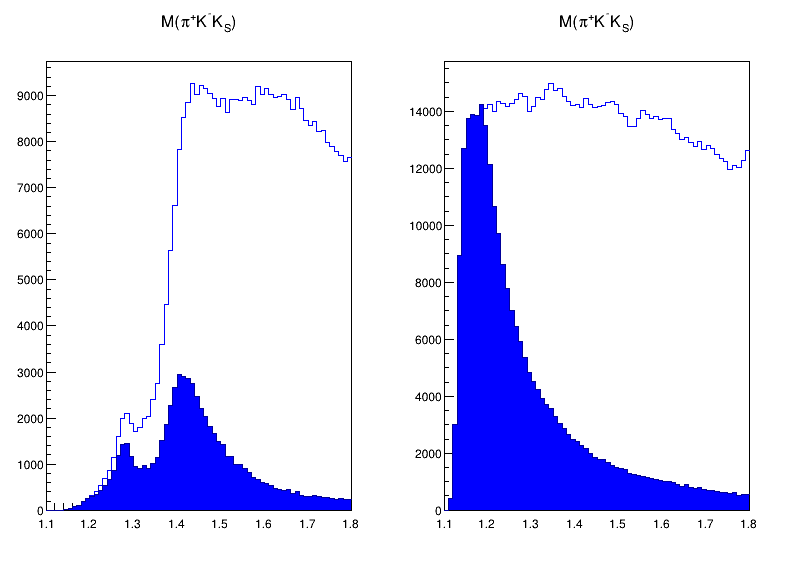

In [7]:
c = ROOT.TCanvas('c', 'c', 800, 600)
c.Divide(2,1)

hist_pipkmks_nocut_data.SetLineColor(ROOT.kBlue)
hist_pipkmks_cut_data.SetFillColor(ROOT.kBlue)
hist_pipkmks_nocut_phasespace.SetLineColor(ROOT.kBlue)
hist_pipkmks_cut_phasespace.SetFillColor(ROOT.kBlue)

c.cd(1)
hist_pipkmks_nocut_data.Draw()
hist_pipkmks_cut_data.Draw('same')
c.cd(2)
hist_pipkmks_nocut_phasespace.Draw()
hist_pipkmks_cut_phasespace.Draw('same')
c.Draw()